<a href="https://colab.research.google.com/github/giorgiobonetta/Delta-Technology/blob/option-pricing/CDS_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit Default Swaps (CDS)**

Credit Default Swaps (CDS) are financial derivatives that function as a form of insurance against the risk of default by an entity, such as a company or a government, that issues debt. Essentially, CDS transfer the risk of default from one investor to another.

### The Structure of CDS
1. **Participants:**
   - **Protection Buyer:** The investor who buys the CDS to protect against the risk of default of an entity.
   - **Protection Seller:** The investor who sells the CDS and takes on the risk of default of the entity, receiving periodic premium payments from the protection buyer.

2. **CDS Premium:**
   - The **protection buyer** pays a periodic premium (usually quarterly) to the **protection seller**. This premium is known as the "CDS spread" and is expressed in basis points (bps) per annum of the notional amount of the underlying debt.

3. **Default Event:**
   - If the underlying entity (e.g., a company) defaults, the **protection seller** must compensate the **protection buyer**. This compensation can be done in two ways:
     - **Physical Settlement:** The protection buyer delivers the defaulted debt to the protection seller in exchange for the notional amount.
     - **Cash Settlement:** The protection seller pays the protection buyer the difference between the notional amount of the debt and the recovery value of the debt post-default.

### How a CDS Works
Suppose an investor holds bonds issued by a company and is concerned about the risk of the company's default. The investor can buy a CDS from another party, who agrees to cover the losses if the company defaults. In return, the investor pays a periodic premium to the CDS seller.

- **Before Default:**
  - The investor pays the periodic premium to the CDS seller.
- **After Default:**
  - If a default occurs, the CDS seller compensates the investor according to the terms of the contract (physical or cash settlement).

### Uses of CDS
1. **Risk Management:** Investors use CDS to hedge their portfolios against the risk of default of the bonds they hold.
2. **Speculation:** Investors can use CDS to bet on the default of an entity without holding the underlying debt.
3. **Arbitrage:** Market participants can seek arbitrage opportunities between the price of CDS and the price of the underlying debt.

**PRICING OF CDS**

We'll use a simplified approach, where we assume a constant hazard rate (default intensity) and a flat yield curve for simplicity. This code will calculate the CDS spread, which is the premium paid by the protection buyer to the protection seller

*Step 1*:
Define the Inputs
First, we define the necessary inputs such as the notional amount, recovery rate, default probability, and the discount rate.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Inputs
notional = 10000000  # Notional amount in dollars
recovery_rate = 0.4  # Recovery rate in case of default
default_probability = 0.02  # Annual default probability
discount_rate = 0.03  # Annual discount rate
maturity = 5  # Maturity in years
payment_frequency = 4  # Quarterly payments

# Time periods
time_periods = np.arange(1/payment_frequency, maturity + 1/payment_frequency, 1/payment_frequency)


*Step 2*: Calculate Discount Factors
We calculate the discount factors for each payment date. The discount factor D(t) is given by 𝐷(𝑡)=𝑒^(−r*t), where 𝑟 is the discount rate and 𝑡 is the time in years.

In [2]:
# Discount factors
discount_factors = np.exp(-discount_rate * time_periods)

*Step 3*: Calculate Survival Probabilities
The survival probability 𝑆(𝑡) at time 𝑡 is given by 𝑆(𝑡)=𝑒^(−𝜆⋅𝑡), where 𝜆 is the hazard rate (default intensity).

In [3]:
# Hazard rate (default intensity)
hazard_rate = -np.log(1 - default_probability)

# Survival probabilities
survival_probabilities = np.exp(-hazard_rate * time_periods)


*Step 4*: Calculate Expected Losses and Premium Leg
The expected loss at each payment date is given by the product of the survival probability and the discount factor. The premium leg is calculated as the sum of these expected losses multiplied by the payment interval.

In [4]:
# Expected losses
expected_losses = (1 - recovery_rate) * (1 - survival_probabilities) * discount_factors

# Premium leg
premium_leg = np.sum(expected_losses) / payment_frequency

*Step 5*: Calculate CDS Spread
The CDS spread is the ratio of the premium leg to the sum of the discounted survival probabilities.

In [5]:
# Discounted survival probabilities
discounted_survival_probabilities = survival_probabilities * discount_factors

# Sum of discounted survival probabilities
sum_discounted_survival_probabilities = np.sum(discounted_survival_probabilities)

# CDS spread
cds_spread = premium_leg / sum_discounted_survival_probabilities
cds_spread_bps = cds_spread * 10000  # Convert to basis points (bps)

print(f"The CDS spread is: {cds_spread_bps:.2f} bps")


The CDS spread is: 79.04 bps


Now proceed plotting some graph

In [ ]:
# Plotting
plt.figure(figsize=(12, 12))

***SURVIVAL PROBABILITIES***: This graph shows the probability that the reference entity will not default by each time period

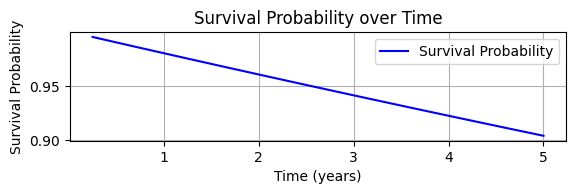

In [13]:
plt.subplot(3, 1, 1)
plt.plot(time_periods, survival_probabilities, label='Survival Probability', color='blue')
plt.xlabel('Time (years)')
plt.ylabel('Survival Probability')
plt.title('Survival Probability over Time')
plt.grid(True)
plt.legend()

***EXPECTED LOSSES***: This graph displays the expected losses, discounted back to the present value, that would occur if the reference entity defaults.

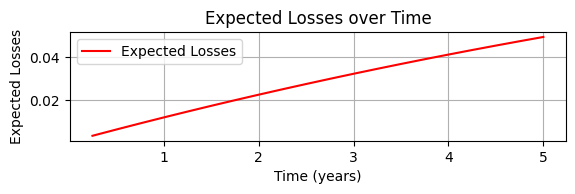

In [15]:
plt.subplot(3, 1, 2)
plt.plot(time_periods, expected_losses, label='Expected Losses', color='red')
plt.xlabel('Time (years)')
plt.ylabel('Expected Losses')
plt.title('Expected Losses over Time')
plt.grid(True)
plt.legend()

***DISCOUNT FACTORS***: This graph illustrates the discount factors applied to future cash flows, showing how their present value diminishes over time due to the discount rate.

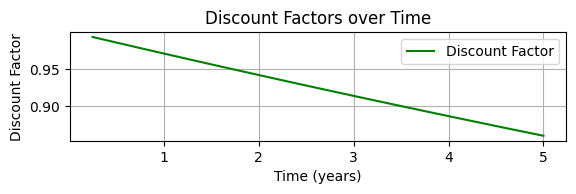

In [17]:
plt.subplot(3, 1, 3)
plt.plot(time_periods, discount_factors, label='Discount Factor', color='green')
plt.xlabel('Time (years)')
plt.ylabel('Discount Factor')
plt.title('Discount Factors over Time')
plt.grid(True)
plt.legend()